<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-1-NLP/blob/master/OK_FastAI_NLP_whiskey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.text import * 

In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

In [0]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/bs3537/DS-Unit-4-Sprint-1-NLP/master/module3-document-classification/train.csv')

In [0]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only) A$133",1
1,3861,"\nAn uncommon exclusive bottling of a 6 year old cask strength malt. Light gold in color, the nose is vegetal, more peat bog than peat smoke, with an undercurrent of pastry cream and rose. It’s an odd combination of aromas. The entry is flavorful and inviting with smoked pineapple, clove, and rose. Peak smoke arrives in full force in the mid-palate, which drops the sweet and becomes spicy. The finish is mostly smoke, but with a pleasant minty coolness. (Wyoming only)",0
2,655,"\nThis release is a port version of Amrut’s Intermediate Sherry — a sort of port pipe sandwich. The spirit is matured in both unused casks and bourbon casks, then spends a few months in port pipes, and then returns to bourbon casks. The result is a Pink Floyd show of a whisky: vibrant, colorful, complex, and nearly too much. A blackcurrant and wispy, smoky nose gives way to an intense and bittersweet mix of chili, blackcurrant, oak, damson, dark chocolate, and peat. Astounding.",1
3,555,"\nThis 41 year old single cask was aged in a sherry butt and interacted magnificently with that wood. The nose offers peeled red apples, sultanas, honey, fudge, milk chocolate, and American cream soda. Balanced and harmonious throughout, the palate yields remarkably fresh orchard fruits, pipe tobacco, black pepper, and ginger. Long in the finish, with cinnamon drying to dark chocolate, and slightly smoky, unobtrusively tannic oak. A 1970s classic!",1
4,1965,"\nQuite herbal on the nose, with aromas of dried tarragon, parsley, and dill, along with cherry, milk chocolate, orange blossom, vanilla bean, and sweet tea. The palate is slightly grain-forward, but is full and well balanced, with orange, dried flowers, chamomile tea, lemon rind, and ginger. The finish offers cinnamon and milk chocolate against a note of candied lemon. Youthful and barrel-influenced, but admirably executed.",1


In [0]:
train['text'] = train['description'].str.strip('\n')

In [0]:
train.head()

,id,description,ratingCategory,text
0,1321,"\nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only) A$133",1,"Sometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only) A$133"
1,3861,"\nAn uncommon exclusive bottling of a 6 year old cask strength malt. Light gold in color, the nose is vegetal, more peat bog than peat smoke, with an undercurrent of pastry cream and rose. It’s an odd combination of aromas. The entry is flavorful and inviting with smoked pineapple, clove, and rose. Peak smoke arrives in full force in the mid-palate, which drops the sweet and becomes spicy. The finish is mostly smoke, but with a pleasant minty coolness. (Wyoming only)",0,"An uncommon exclusive bottling of a 6 year old cask strength malt. Light gold in color, the nose is vegetal, more peat bog than peat smoke, with an undercurrent of pastry cream and rose. It’s an odd combination of aromas. The entry is flavorful and inviting with smoked pineapple, clove, and rose. Peak smoke arrives in full force in the mid-palate, which drops the sweet and becomes spicy. The finish is mostly smoke, but with a pleasant minty coolness. (Wyoming only)"
2,655,"\nThis release is a port version of Amrut’s Intermediate Sherry — a sort of port pipe sandwich. The spirit is matured in both unused casks and bourbon casks, then spends a few months in port pipes, and then returns to bourbon casks. The result is a Pink Floyd show of a whisky: vibrant, colorful, complex, and nearly too much. A blackcurrant and wispy, smoky nose gives way to an intense and bittersweet mix of chili, blackcurrant, oak, damson, dark chocolate, and peat. Astounding.",1,"This release is a port version of Amrut’s Intermediate Sherry — a sort of port pipe sandwich. The spirit is matured in both unused casks and bourbon casks, then spends a few months in port pipes, and then returns to bourbon casks. The result is a Pink Floyd show of a whisky: vibrant, colorful, complex, and nearly too much. A blackcurrant and wispy, smoky nose gives way to an intense and bittersweet mix of chili, blackcurrant, oak, damson, dark chocolate, and peat. Astounding."
3,555,"\nThis 41 year old single cask was aged in a sherry butt and interacted magnificently with that wood. The nose offers peeled red apples, sultanas, honey, fudge, milk chocolate, and American cream soda. Balanced and harmonious throughout, the palate yields remarkably fresh orchard fruits, pipe tobacco, black pepper, and ginger. Long in the finish, with cinnamon drying to dark chocolate, and slightly smoky, unobtrusively tannic oak. A 1970s classic!",1,"This 41 year old single cask was aged in a sherry butt and interacted magnificently with that wood. The nose offers peeled red apples, sultanas, honey, fudge, milk chocolate, and American cream soda. Balanced and harmonious throughout, the palate yields remarkably fresh orchard fruits, pipe tobacco, black pepper, and ginger. Long in the finish, with cinnamon drying to dark chocolate, and slightly smoky, unobtrusively tannic oak. A 1970s classic!"
4,1965,"\nQuite herbal on the nose, with aromas of dried tarragon, parsley, an

In [0]:
train2 = train.drop(columns=['description', 'id'])

In [0]:
train2.head()

,ratingCategory,text
0,1,"Sometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only) A$133"
1,0,"An uncommon exclusive bottling of a 6 year old cask strength malt. Light gold in color, the nose is vegetal, more peat bog than peat smoke, with an undercurrent of pastry cream and rose. It’s an odd combination of aromas. The entry is flavorful and inviting with smoked pineapple, clove, and rose. Peak smoke arrives in full force in the mid-palate, which drops the sweet and becomes spicy. The finish is mostly smoke, but with a pleasant minty coolness. (Wyoming only)"
2,1,"This release is a port version of Amrut’s Intermediate Sherry — a sort of port pipe sandwich. The spirit is matured in both unused casks and bourbon casks, then spends a few months in port pipes, and then returns to bourbon casks. The result is a Pink Floyd show of a whisky: vibrant, colorful, complex, and nearly too much. A blackcurrant and wispy, smoky nose gives way to an intense and bittersweet mix of chili, blackcurrant, oak, damson, dark chocolate, and peat. Astounding."
3,1,"This 41 year old single cask was aged in a sherry butt and interacted magnificently with that wood. The nose offers peeled red apples, sultanas, honey, fudge, milk chocolate, and American cream soda. Balanced and harmonious throughout, the palate yields remarkably fresh orchard fruits, pipe tobacco, black pepper, and ginger. Long in the finish, with cinnamon drying to dark chocolate, and slightly smoky, unobtrusively tannic oak. A 1970s classic!"
4,1,"Quite herbal on the nose, with aromas of dried tarragon, parsley, and dill, along with cherry, milk chocolate, orange blossom, vanilla bean, and sweet tea. The palate is slightly grain-forward, but is full and well balanced, with orange, dried flowers, chamomile tea, lemon rind, and ginger. The finish offers cinnamon and milk chocolate against a note of candied lemon. Youthful and barrel-influenced, but admirably executed."


In [0]:
train3 = train2.rename(columns={"ratingCategory": "label"})

In [0]:
train3.head()

,label,text
0,1,"Sometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only) A$133"
1,0,"An uncommon exclusive bottling of a 6 year old cask strength malt. Light gold in color, the nose is vegetal, more peat bog than peat smoke, with an undercurrent of pastry cream and rose. It’s an odd combination of aromas. The entry is flavorful and inviting with smoked pineapple, clove, and rose. Peak smoke arrives in full force in the mid-palate, which drops the sweet and becomes spicy. The finish is mostly smoke, but with a pleasant minty coolness. (Wyoming only)"
2,1,"This release is a port version of Amrut’s Intermediate Sherry — a sort of port pipe sandwich. The spirit is matured in both unused casks and bourbon casks, then spends a few months in port pipes, and then returns to bourbon casks. The result is a Pink Floyd show of a whisky: vibrant, colorful, complex, and nearly too much. A blackcurrant and wispy, smoky nose gives way to an intense and bittersweet mix of chili, blackcurrant, oak, damson, dark chocolate, and peat. Astounding."
3,1,"This 41 year old single cask was aged in a sherry butt and interacted magnificently with that wood. The nose offers peeled red apples, sultanas, honey, fudge, milk chocolate, and American cream soda. Balanced and harmonious throughout, the palate yields remarkably fresh orchard fruits, pipe tobacco, black pepper, and ginger. Long in the finish, with cinnamon drying to dark chocolate, and slightly smoky, unobtrusively tannic oak. A 1970s classic!"
4,1,"Quite herbal on the nose, with aromas of dried tarragon, parsley, and dill, along with cherry, milk chocolate, orange blossom, vanilla bean, and sweet tea. The palate is slightly grain-forward, but is full and well balanced, with orange, dried flowers, chamomile tea, lemon rind, and ginger. The finish offers cinnamon and milk chocolate against a note of candied lemon. Youthful and barrel-influenced, but admirably executed."


In [0]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(train3, stratify = train3['label'], test_size = 0.30, random_state=42)

df_trn.shape, df_val.shape

((2860, 2), (1227, 2))

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj following xxmaj tennessee ’s practice of charcoal - filtering the distillate before aging , this whiskey is soft around the edges yet delivers plenty of intensity . xxmaj the mouthwatering peanut aromas evoke memories of cracking open a school xxunk while the palate delivers abundant fruit : orange marmalade and caramel apple . xxmaj fine bitter - sweet balance suggests burnt sugar , xxmaj mexican chocolate , chocolate",1
"xxbos xxmaj very well - balanced and mellow on the nose and palate . xxmaj sweet notes of mature dark rum , toffee , nougat , and candy corn dovetail with dried apricot , golden raisin , hot cinnamon , soft mint tea , and vanilla . xxmaj polished leather and tobacco leaves on a long , contemplative finish . xxmaj this is what",0
"xxbos xxmaj though xxmaj brora has acquired cult status , it has to be said that for a few years these xxmaj special xxmaj release xxmaj broras went through an off - putting xxunk phase , which might well have put off xxunk to this legendary closed site , who must have wondered what all the xxunk was about . \r \n xxmaj one nose of the 2010 xxup",0
"xxbos xxmaj the xxmaj eigashima distillery , on the xxmaj xxunk xxmaj strait near xxmaj xxunk , may be the least well known of xxmaj japan ’s single malt plants , but has a sound claim to be the country ’s oldest , as its xxunk to make whisky was xxunk in xxunk — four years before xxmaj yamazaki was built . xxmaj it has , however , xxunk in",0
"xxbos xxmaj unusual , xxunk as this is the one chance a year that drinkers get to try xxmaj caol xxmaj ila ’s other expression : the unpeated version , which — and here ’s a bit of history for you — helped save the distillery during the lean period of the whisky loch in the early 80s . xxmaj rather than this just being xxmaj caol xxmaj ila with",1


In [0]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')
data_lm = load_data('./', 'data_lm_export.pkl')
data_clas = load_data('./', 'data_clas_export.pkl', bs=64)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 4.37E-02


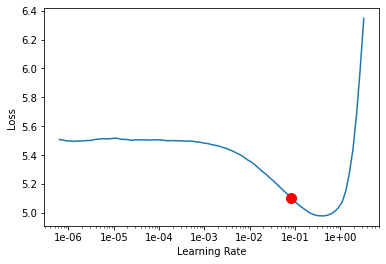

In [0]:

learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.295590,3.899121,0.332068,00:08
1,3.667423,3.659857,0.352811,00:08


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.078683,3.551246,0.364939,00:08
1,2.919135,3.546863,0.367411,00:08


In [0]:
learn.predict("How do", n_words=10)

'How do you like a whiskey ? You can get its'

In [0]:
learn.save_encoder('ft_enc')

In [0]:
#Using the Language Model to Train the Classifier

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (2860 items)
x: TextList
xxbos xxmaj exudes beautiful soft peat notes , barley sugar , and apple - cinnamon granola . xxmaj light lemon and honey , with a delightful growth in apple crumble flavors , golden syrup , and more peat smoke and orchard fruits on the finish . xxmaj drink this neat .,xxbos xxmaj somewhat vegetal on the nose , with stewed fruit , licorice , tarragon , ginger , butterscotch , and hazelnuts . xxmaj more stewed fruit , salted licorice , and hazelnuts appear on the palate , along with white pepper , clove , and bitter oak . xxmaj an abrupt whisky whose better characteristics are muddied by the first - fill rum cask finish . ( xxmaj trader xxmaj joe ’s ),xxbos a xxunk xxmaj canadian blend , bottled in xxmaj oregon . xxmaj rich toffee and caramel aroma with xxunk and some dry cocoa . xxmaj an easy entry , with sweet , light , but coating caramel , a xxunk note of young blending whisky , some cedar shavings , and a 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 3.63E-02


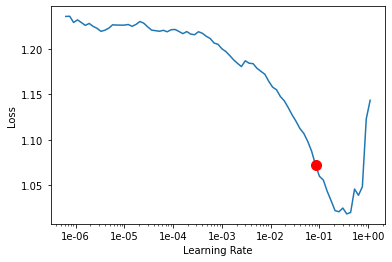

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.752867,0.631008,0.691117,00:08
1,0.647612,0.609314,0.716381,00:08


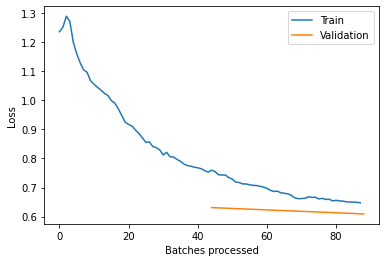

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.578551,0.616361,0.713936,00:08
1,0.563226,0.581575,0.722086,00:08
2,0.537070,0.586153,0.740016,00:08
3,0.510648,0.582462,0.744091,00:08


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.484960,0.596003,0.741646,00:08
1,0.478840,0.596835,0.751426,00:08
2,0.452809,0.600535,0.751426,00:08
3,0.422921,0.605116,0.740016,00:08


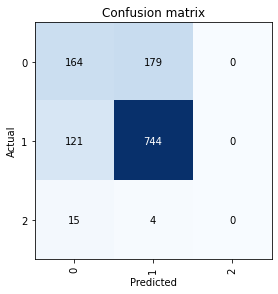

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()